# 3D representation

To unify different datasets regarding the 3d pose we simplfy all models to adher to the following pose model:

* head (1)
* neck (2)
* left-shoulder (3)
* left-elbow (4)
* left-hand (5)
* right-shoulder (6)
* right-elbow (7)
* right-hand (8)
* left-hip (9)
* left-knee (10)
* left-foot (11)
* right-hip (12)
* right-knee (13)
* right-foot (14)

For the datasets **UMPM**, **MARCOnI** and **CMUdb** a conversion function is provided

In [2]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../../settings.txt'))
print('\n')
# ------------------
import cv2
import numpy as np
from os.path import join, isdir
import sys; sys.path.insert(0,'../../')
import mvpose.data.transform as tfm
from mvpose.plot import skeleton
import matplotlib.pyplot as plt
root = join(Settings['data_root'], 'pak')

## UMPM

UMPM


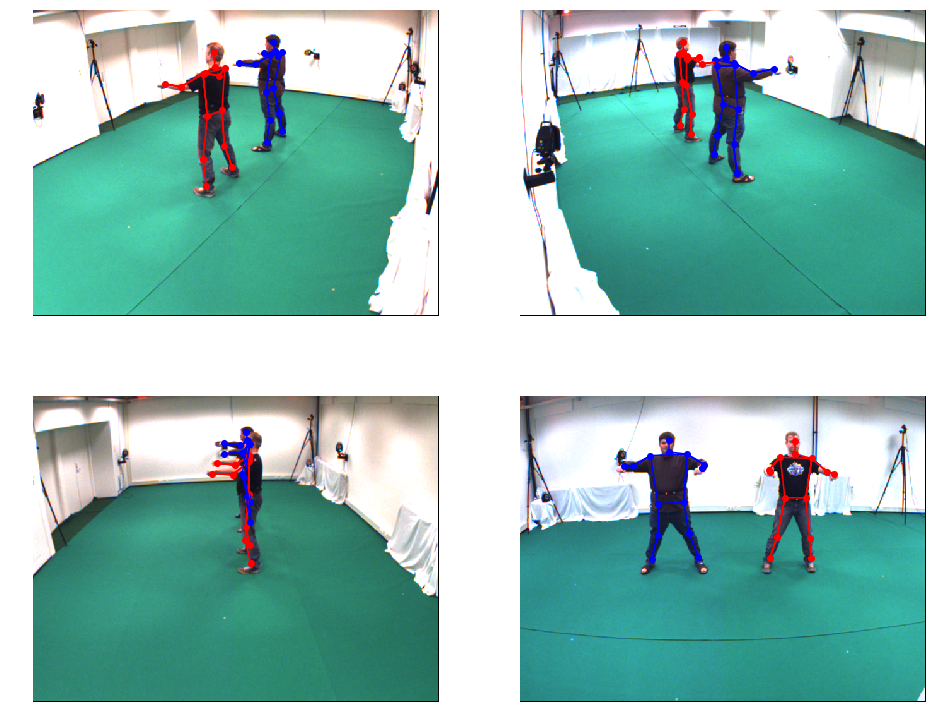

In [3]:
from pak.datasets.UMPM import UMPM
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

X, Y, Calib = tfm.get_from_umpm(root, 'p2_free_1', user, pwd)

def handle_img(ax, cam, frame=0):
    calib = Calib[cam]
    y = Y[frame]
    rvec = np.array(calib['rvec'])
    tvec = np.array(calib['tvec'])
    distCoef = np.array(calib['distCoeff'])
    K = calib['K']
    
    color_per_pid = [(1, 0, 0), (0, 0, 1)]
    
    points = []; color = []
    for x,y,z,pid in y:
        points.append((x,y,z))
        color.append(color_per_pid[int(pid)])
    

    points = np.array(points)

    res = np.squeeze(cv2.projectPoints(points, 
                            rvec.astype('float32'), 
                            tvec.astype('float32'), 
                            K.astype('float32'), distCoef)[0])


    for i,(px,py) in enumerate(res):
        ax.scatter(px, py, c=color[i])
        
    for i, (x,y) in enumerate(skeleton.generate(res)):
        ax.plot(x,y, c=color_per_pid[i])

    Im = X[cam][frame]
    ax.axis('off')
    ax.imshow(Im)

frame = 0
fig = plt.figure(figsize=(16,13))
handle_img(fig.add_subplot(221), 0, frame=frame)
handle_img(fig.add_subplot(222), 1, frame=frame)
handle_img(fig.add_subplot(223), 2, frame=frame)
handle_img(fig.add_subplot(224), 3, frame=frame)

## CMU

### Ultimatum1

Get the data as follows:

Go to the data directory for cmu-panoptic (data-root must be set in the settings.txt):
```bash
cd /data-root/cmu_panoptic
```

there download the data:
```bash
./getData.sh 160422_ultimatum1 10 0
```

and then extract the video images:
```bash
./extractAll.sh.sh 160422_ultimatum1
```

In [ ]:
cmu_root = Settings['CMU']['data_root']; assert isdir(cmu_root)
#print(cmu_root)

X, Calib = tfm.get_from_cmu_panoptic(cmu_root, '160422_ultimatum1')

handling video 01_01


In [ ]:
I = X[0,9]

plt.imshow(I)